In [148]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [342]:
df = pd.read_csv('train.csv')

In [343]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [344]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

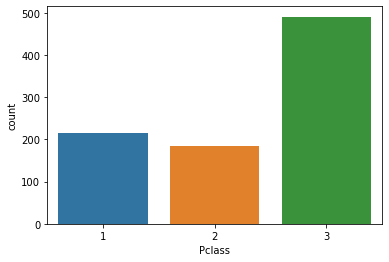

In [345]:
print(df['Pclass'].value_counts())
sns.countplot(df['Pclass'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

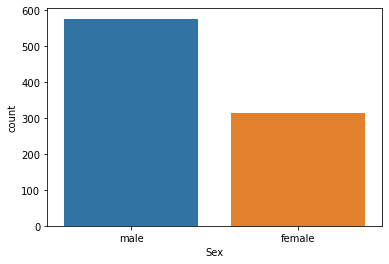

In [346]:
sns.countplot(df['Sex'])

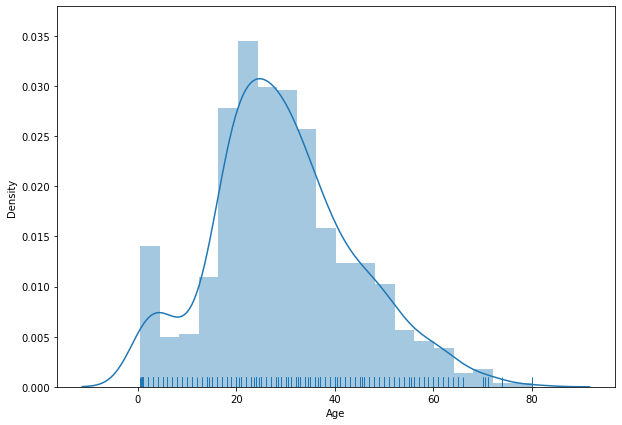

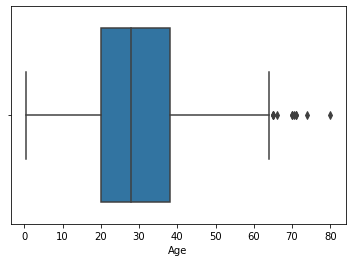

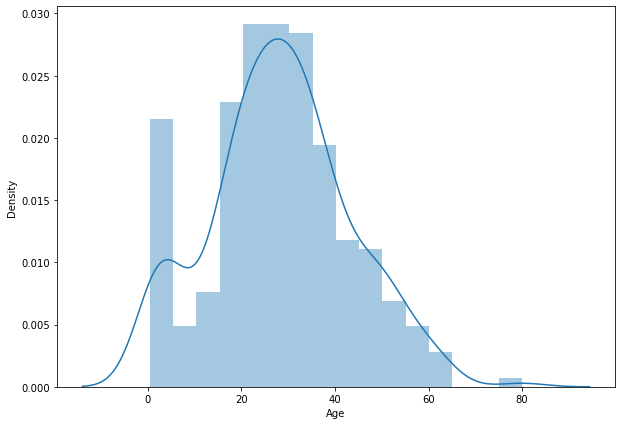

In [347]:
plt.subplots(figsize=(10,7))
sns.distplot(df['Age'],rug=True)
plt.show()
sns.boxplot(df['Age'])
plt.show()
plt.subplots(figsize=(10,7))
sns.distplot(df[df['Survived']==1]['Age'])
df['age_category'] = pd.cut(df['Age'].fillna(df['Age'].mean()).astype(int), bins=[-1,11,18,22,27,33,40,66,100],
                            labels=["<=11","11-18","19-22","23-27","28-33","34-40","41-66",">=67"])

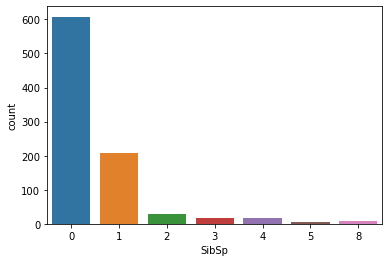

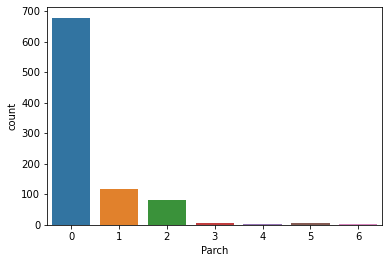

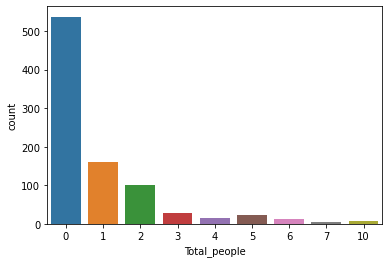

In [348]:
df['Total_people'] = df['SibSp']+df['Parch']
sns.countplot(df['SibSp'])
plt.show()
sns.countplot(df['Parch'])
plt.show()
sns.countplot(df['Total_people'])
plt.show()

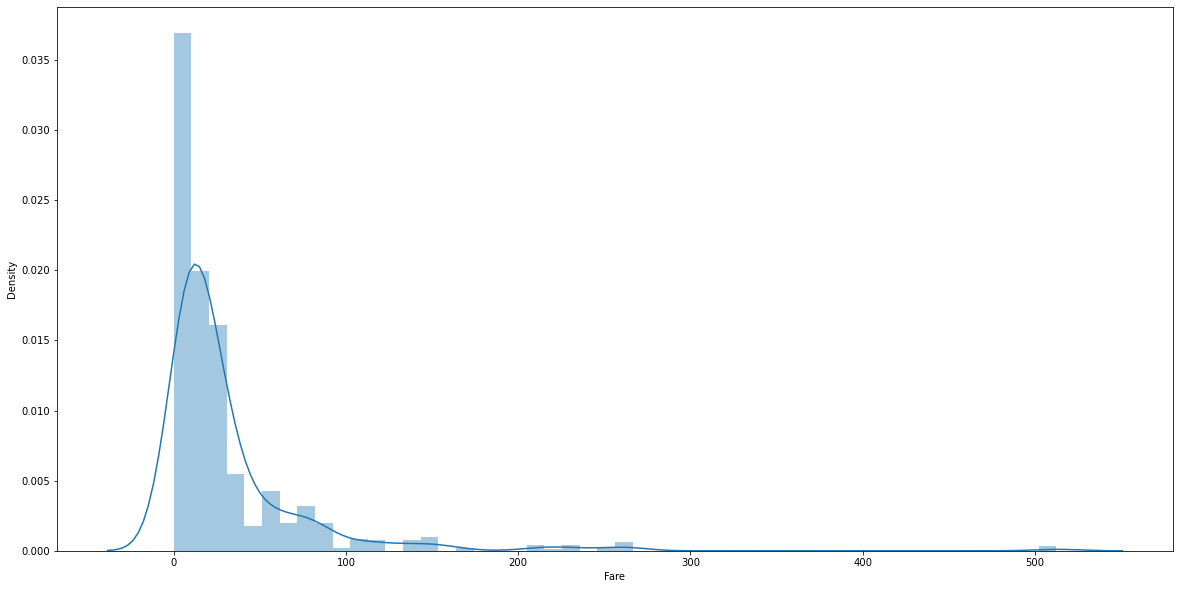

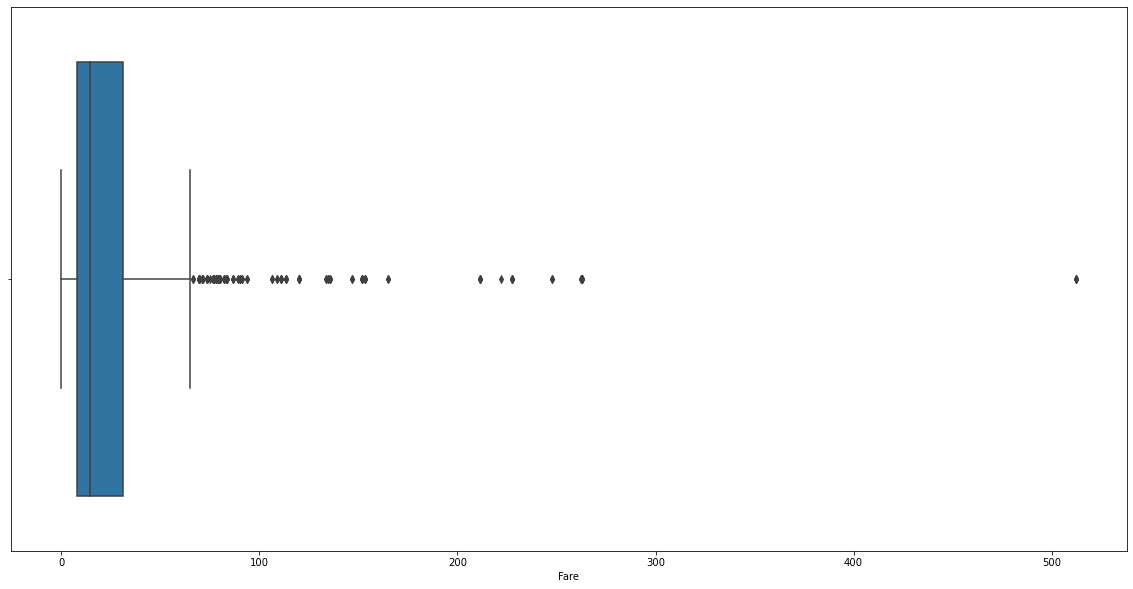

In [349]:
plt.subplots(figsize=(20,10))
fare_log=np.log(df['Fare'])
sns.distplot(df['Fare'],bins=50)
plt.show()
plt.subplots(figsize=(20,10))
sns.boxplot(df['Fare']);

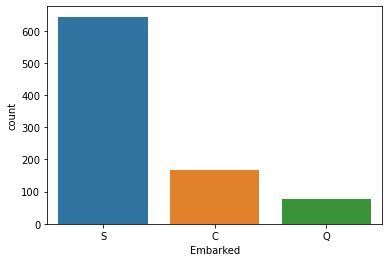

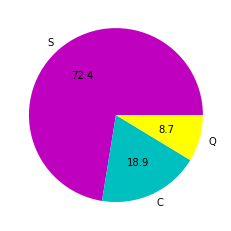

In [350]:
sns.countplot(df['Embarked'])
plt.show()
Embark=df['Embarked'].value_counts()
plt.pie(x=Embark[:],labels=Embark.index,autopct='%.1f',colors=['m','c','yellow','orange']);

In [351]:
def barplot(x,y):
    col = pd.crosstab(df[x],df[y])
    col['Total People']=col[0]+col[1]
    col.rename(columns={0:'No',1:'Yes'},inplace=True)
    col[['Total People','Yes','No']].plot(kind='bar',figsize=(10,7));

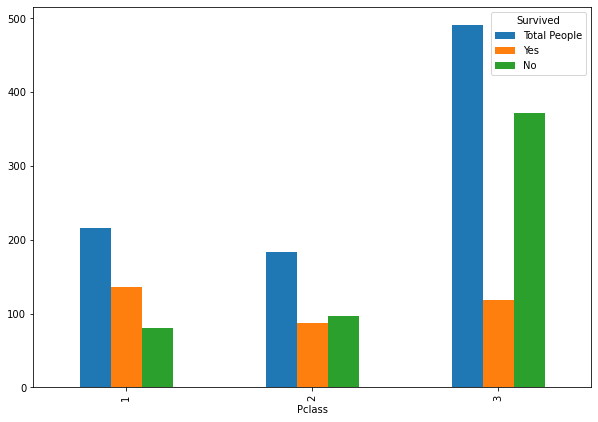

In [352]:
barplot('Pclass','Survived')

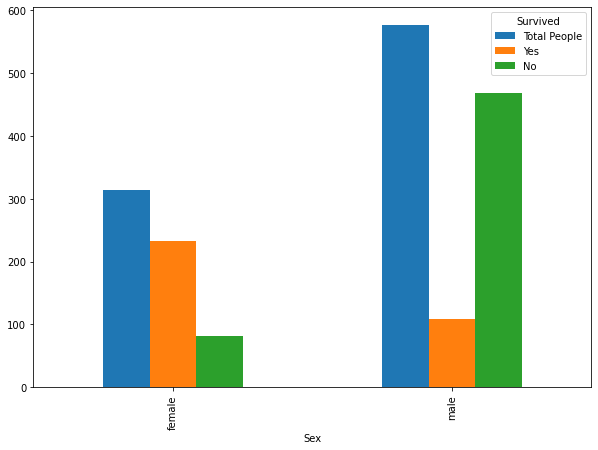

In [353]:
barplot('Sex','Survived')

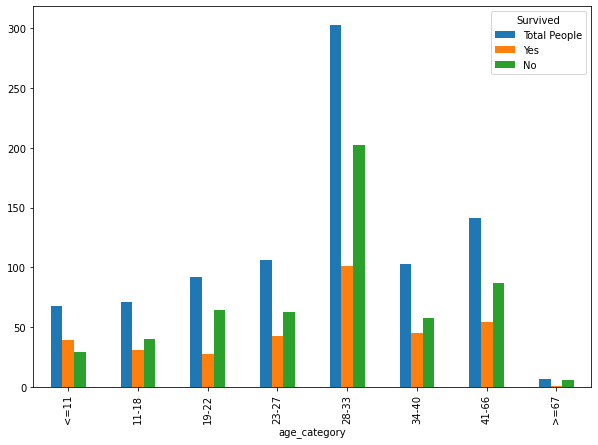

In [354]:
barplot('age_category','Survived')

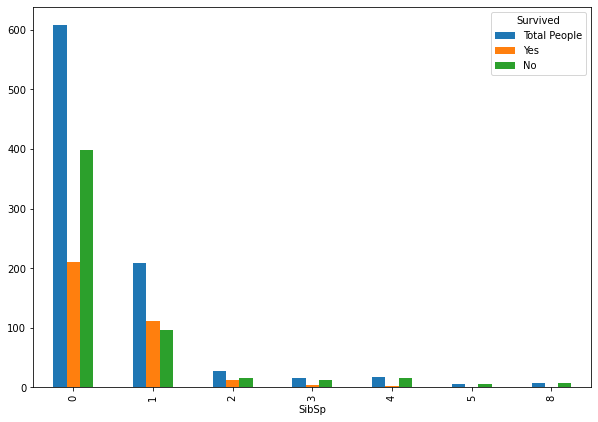

In [355]:
barplot('SibSp','Survived')

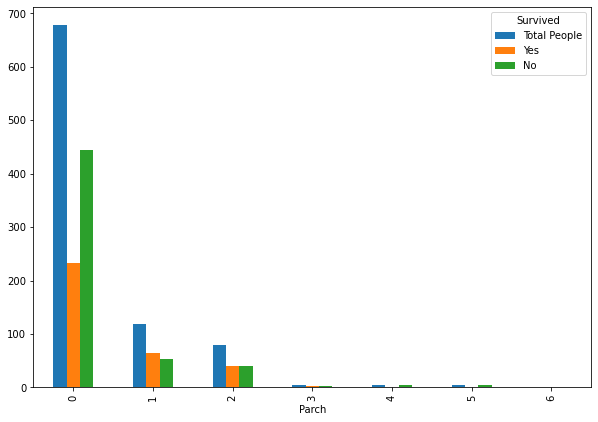

In [356]:
barplot('Parch','Survived')

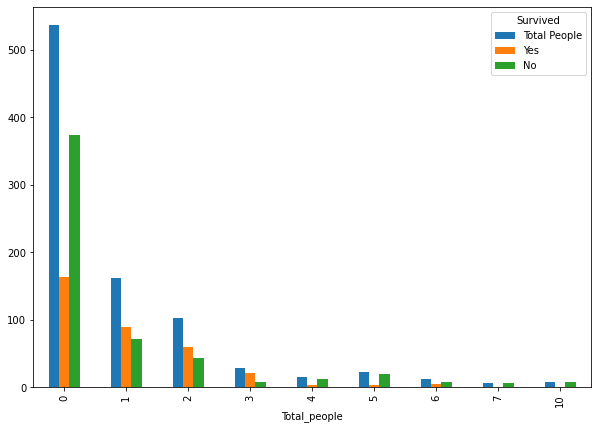

In [282]:
barplot('Total_people','Survived')

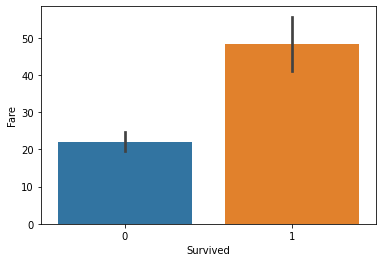

In [283]:
sns.barplot(df['Survived'],df['Fare'])
plt.show()

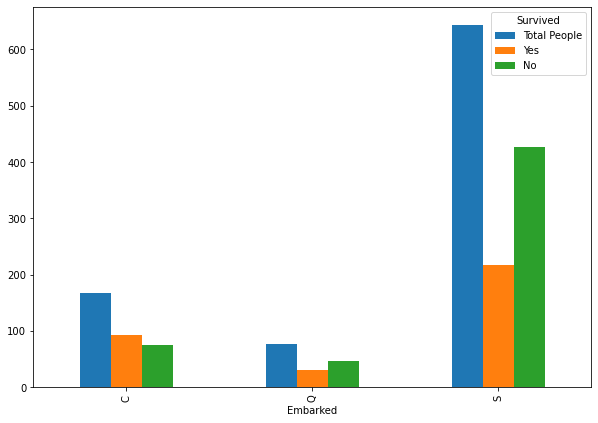

In [284]:
barplot('Embarked','Survived')

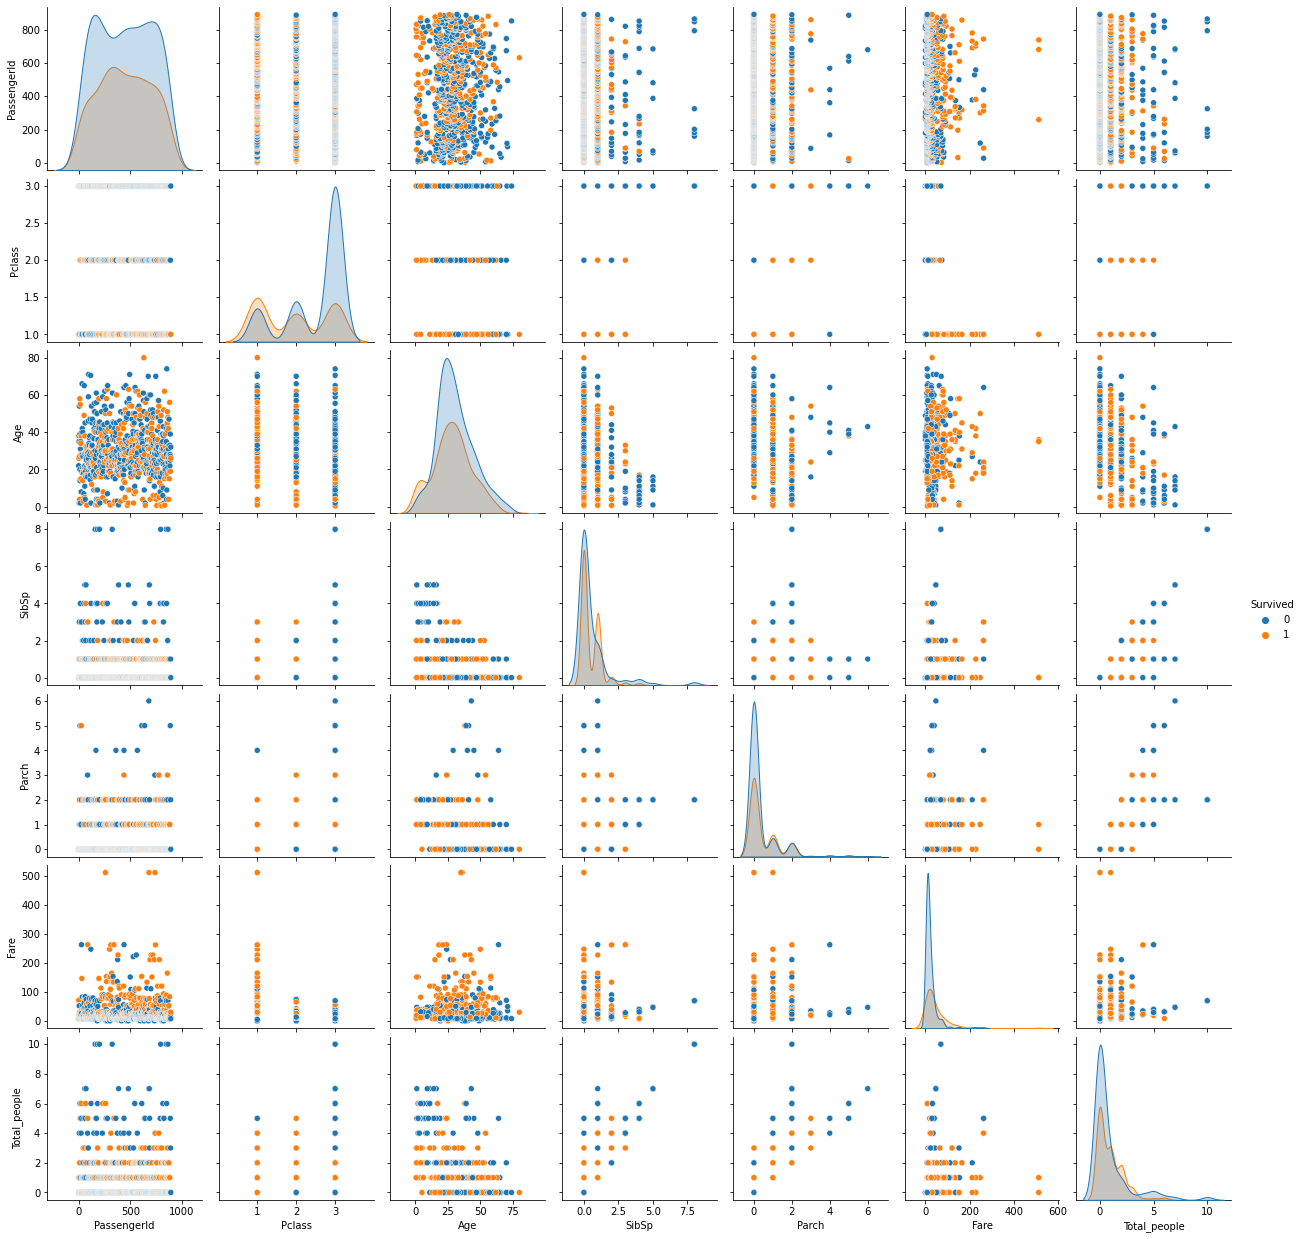

In [285]:
sns.pairplot(df,hue='Survived');

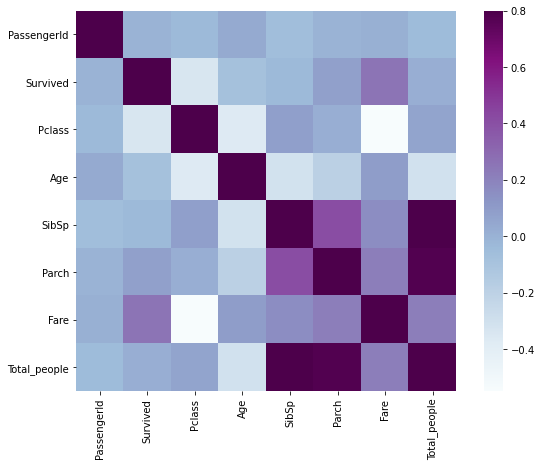

In [288]:
matrix = df.corr()
matrix
plt.subplots(figsize=(10,7))
sns.heatmap(matrix,vmax=0.8,square=True,cmap='BuPu');

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

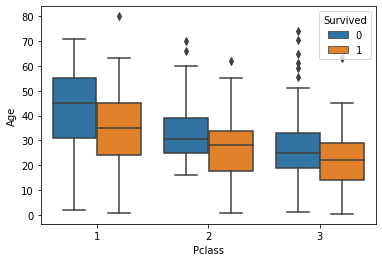

In [289]:
sns.boxplot(df['Pclass'],df['Age'],hue=df['Survived'])

In [357]:
df.isnull().sum()
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
age_category    0
Total_people    0
dtype: int64

In [358]:
df['Title'] = df['Name'].str.extract(r',\s?(.+?)\.\s')
df['Title'] = df['Title'].replace(['Sir','Capt','Don','Col','Jonkheer','Rev','Major'], 'Mr')
df['Title'] = df['Title'].replace(['Dona','the Countess','Lady'], 'Mrs')
df['Title'] = df['Title'].replace(['Ms','Mlle','Mme'], 'Miss')
df['Title'].value_counts()

Mr        531
Miss      186
Mrs       127
Master     40
Dr          7
Name: Title, dtype: int64

In [359]:
df.loc[df['Age'] <= 16, 'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
df.loc[(df['Age'] > 64) & (df['Age'] <= 80), 'Age'] = 4
df['Age'].value_counts()

1.0    523
2.0    188
0.0    100
3.0     69
4.0     11
Name: Age, dtype: int64

In [360]:
df.drop(['PassengerId','Name','Ticket','Cabin','age_category'],axis=1,inplace=True)

In [361]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [296]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_people,Title
0,0,3,male,1.0,1,0,7.2500,S,1,Mr
1,1,1,female,2.0,1,0,71.2833,C,1,Mrs
2,1,3,female,1.0,0,0,7.9250,S,0,Miss
3,1,1,female,2.0,1,0,53.1000,S,1,Mrs
4,0,3,male,2.0,0,0,8.0500,S,0,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,1.0,0,0,13.0000,S,0,Rev
887,1,1,female,1.0,0,0,30.0000,S,0,Miss
888,0,3,female,1.0,1,2,23.4500,S,3,Miss
889,1,1,male,1.0,0,0,30.0000,C,0,Mr


In [362]:
y=df['Survived']
X = pd.get_dummies(df.drop('Survived',1))

In [363]:
cols_to_norm = ['Fare']
X[cols_to_norm] = StandardScaler().fit_transform(X[cols_to_norm])

In [364]:
X_train, X_cv, y_train, y_cv = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,Pclass,Age,SibSp,Parch,Fare,Total_people,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs
331,1,2.0,0,0,-0.074583,0,0,1,0,0,1,0,0,0,1,0
733,2,1.0,0,0,-0.386671,0,0,1,0,0,1,0,0,0,1,0
382,3,1.0,0,0,-0.488854,0,0,1,0,0,1,0,0,0,1,0
704,3,1.0,1,0,-0.490280,1,0,1,0,0,1,0,0,0,1,0
813,3,0.0,4,2,-0.018709,6,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,1.0,0,0,-0.494391,0,1,0,0,0,1,0,0,1,0,0
270,1,1.0,0,0,-0.024246,0,0,1,0,0,1,0,0,0,1,0
860,3,2.0,2,0,-0.364355,2,0,1,0,0,1,0,0,0,1,0
435,1,0.0,1,2,1.767741,3,1,0,0,0,1,0,0,1,0,0


In [365]:
model = LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_cv)
print('Accuracy of Logistic Regression: ',accuracy_score(y_cv,pred)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of Logistic Regression:  81.56424581005587
              precision    recall  f1-score   support

           0       0.85      0.84      0.84       106
           1       0.77      0.78      0.78        73

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[89 16]
 [17 57]]


In [366]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
pred=model.predict(X_cv)
print('Accuracy of KNeighborsClassifier: ',accuracy_score(y_cv,pred)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of KNeighborsClassifier:  81.00558659217877
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       109
           1       0.74      0.79      0.76        70

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179

[[90 15]
 [19 55]]


In [367]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_cv)
print('Accuracy of DecisionTreeClassifier: ',model.score(X_cv,y_cv)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of DecisionTreeClassifier:  80.44692737430168
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       110
           1       0.73      0.78      0.76        69

    accuracy                           0.80       179
   macro avg       0.79      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179

[[90 15]
 [20 54]]


In [368]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_cv)
print('Accuracy of RandomForestClassifier: ',model.score(X_cv,y_cv)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of RandomForestClassifier:  82.12290502793296
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       101
           1       0.81      0.77      0.79        78

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179

[[87 18]
 [14 60]]


In [369]:
model = SVC()
model.fit(X_train,y_train)
pred=model.predict(X_cv)
print('Accuracy of Support Vector Machine: ',model.score(X_cv,y_cv)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of Support Vector Machine:  82.68156424581005
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       110
           1       0.76      0.81      0.78        69

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

[[92 13]
 [18 56]]


In [370]:
model = GaussianNB()
model.fit(X_train,y_train)
pred=model.predict(X_cv)
print('Accuracy of Gaussian Naive Bayes: ',model.score(X_cv,y_cv)*100)

print(classification_report(pred,y_cv))
print(confusion_matrix(y_cv,pred))

Accuracy of Gaussian Naive Bayes:  79.88826815642457
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       103
           1       0.77      0.75      0.76        76

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[86 19]
 [17 57]]


In [371]:
df_test = pd.read_csv('test.csv')

In [372]:
df_test['Total_people'] = df_test['SibSp']+df_test['Parch']

In [373]:
df_test.isnull().sum()
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
df_test['Cabin'].fillna(df_test['Cabin'].mode()[0],inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(),inplace=True)
df_test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
Total_people    0
dtype: int64

In [374]:
df_test['Title'] = df_test['Name'].str.extract(r',\s?(.+?)\.\s')
df_test['Title'] = df_test['Title'].replace(['Sir','Capt','Don','Col','Jonkheer','Rev','Major'], 'Mr')
df_test['Title'] = df_test['Title'].replace(['Dona','the Countess','Lady'], 'Mrs')
df_test['Title'] = df_test['Title'].replace(['Ms','Mlle','Mme'], 'Miss')
df_test['Title'].value_counts()

Mr        244
Miss       79
Mrs        73
Master     21
Dr          1
Name: Title, dtype: int64

In [375]:
df_test.loc[df_test['Age'] <= 16, 'Age'] = 0
df_test.loc[(df_test['Age'] > 16) & (df_test['Age'] <= 32), 'Age'] = 1
df_test.loc[(df_test['Age'] > 32) & (df_test['Age'] <= 48), 'Age'] = 2
df_test.loc[(df_test['Age'] > 48) & (df_test['Age'] <= 64), 'Age'] = 3
df_test.loc[(df_test['Age'] > 64) & (df_test['Age'] <= 80), 'Age'] = 4
df_test['Age'].value_counts()

1.0    264
2.0     81
3.0     37
0.0     34
4.0      2
Name: Age, dtype: int64

In [376]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total_people,Title
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,7.8292,B57 B59 B63 B66,Q,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.0,1,0,363272,7.0000,B57 B59 B63 B66,S,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,3.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,0,Mr
3,895,3,"Wirz, Mr. Albert",male,1.0,0,0,315154,8.6625,B57 B59 B63 B66,S,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,1.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S,0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,2.0,0,0,PC 17758,108.9000,C105,C,0,Mrs
415,1307,3,"Saether, Mr. Simon Sivertsen",male,2.0,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S,0,Mr
416,1308,3,"Ware, Mr. Frederick",male,1.0,0,0,359309,8.0500,B57 B59 B63 B66,S,0,Mr


In [377]:
df_test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [378]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Total_people,Title
0,3,male,2.0,0,0,7.8292,Q,0,Mr
1,3,female,2.0,1,0,7.0000,S,1,Mrs
2,2,male,3.0,0,0,9.6875,Q,0,Mr
3,3,male,1.0,0,0,8.6625,S,0,Mr
4,3,female,1.0,1,1,12.2875,S,2,Mrs
...,...,...,...,...,...,...,...,...,...
413,3,male,1.0,0,0,8.0500,S,0,Mr
414,1,female,2.0,0,0,108.9000,C,0,Mrs
415,3,male,2.0,0,0,7.2500,S,0,Mr
416,3,male,1.0,0,0,8.0500,S,0,Mr


In [379]:
X_test = pd.get_dummies(df_test)

In [380]:
cols_to_norm = ['Fare']
X_test[cols_to_norm] = StandardScaler().fit_transform(X_test[cols_to_norm])

In [381]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Total_people,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Dr,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,3,2.0,0,0,-0.497413,0,0,1,0,1,0,0,0,0,1,0
1,3,2.0,1,0,-0.512278,1,1,0,0,0,1,0,0,0,0,1
2,2,3.0,0,0,-0.464100,0,0,1,0,1,0,0,0,0,1,0
3,3,1.0,0,0,-0.482475,0,0,1,0,0,1,0,0,0,1,0
4,3,1.0,1,1,-0.417492,2,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,1.0,0,0,-0.493455,0,0,1,0,0,1,0,0,0,1,0
414,1,2.0,0,0,1.314435,0,1,0,1,0,0,0,0,0,0,1
415,3,2.0,0,0,-0.507796,0,0,1,0,0,1,0,0,0,1,0
416,3,1.0,0,0,-0.493455,0,0,1,0,0,1,0,0,0,1,0


In [382]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred=model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,